In [25]:
# essential libraries
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# read the image
image = cv2.imread('downloads/coins.jpg')

In [27]:
# convert original image to gray
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [28]:
# perform 5x5 gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

In [29]:
# convert image to binary
_, inverted_binary_image = cv2.threshold(blurred_image, 130, 255, cv2.THRESH_BINARY)

In [30]:
# lets highlight the coins
binary_image = cv2.bitwise_not(inverted_binary_image)

In [31]:
# find the contours
_, coin_contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [32]:
# make a copy of the image
bounding_image = np.copy(image)

In [33]:
# declare minimum area and an empty list
minimum_area = 60
large_contours = []

# loop to find large contours
for contour in coin_contours:
    if cv2.contourArea(contour) > minimum_area:
        large_contours.append(contour)


In [34]:
# draw bounding rectangle for each coin
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_image, (x, y), (x+w, y+h), (0, 255, 0), 3)

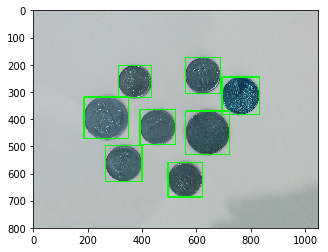

In [35]:
plt.imshow(bounding_image)

In [36]:
cv2.imwrite("output.jpg", bounding_image)

True